In [49]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set('talk')
import matplotlib.pyplot as plt
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 9),
         'axes.labelsize': 'medium',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'small',
         'ytick.labelsize':'small'}
plt.rcParams.update(params)

In [94]:
df = pd.read_json('analysis.json')
df

,Delay Threshold,N,Exit,confidence (add),"confidence (add,weighted)",confidence (max),latest,missed,"score-margin (add,weighted)",score-margin (max),score_margin (add)
0,50,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55,5000,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60,5000,"[117.0, 14.0, 0.0, 0.0]",0.488550,0.488550,0.488550,0.496183,4869.0,0.488550,0.488550,0.488550
3,65,5000,"[282.0, 908.0, 107.0, 4.0]",0.678709,0.691776,0.677171,0.691007,3699.0,0.681015,0.674097,0.674097
4,70,5000,"[512.0, 2289.0, 223.0, 14.0]",0.708361,0.718565,0.707044,0.717248,1962.0,0.711323,0.703752,0.705727
5,75,5000,"[297.0, 3120.0, 931.0, 53.0]",0.741877,0.752102,0.743240,0.750057,599.0,0.745285,0.733015,0.739377
6,80,5000,"[118.0, 2408.0, 2106.0, 169.0]",0.773381,0.785878,0.779629,0.784003,199.0,0.777963,0.761716,0.771506
7,85,5000,"[45.0, 943.0, 3443.0, 494.0]",0.807310,0.818071,0.814619,0.819086,75.0,0.811777,0.789645,0.806701
8,90,5000,"[31.0, 270.0, 3718.0, 937.0]",0.820420,0.832324,0.827684,0.833737,44.0,0.825464,0.799233,0.820420
9,95,5000,"[26.0, 83.0, 3728.0, 1132.0]",0.824914,0.836788,0.833769,0.839807,31.0,0.831354,0.802777,0.826524


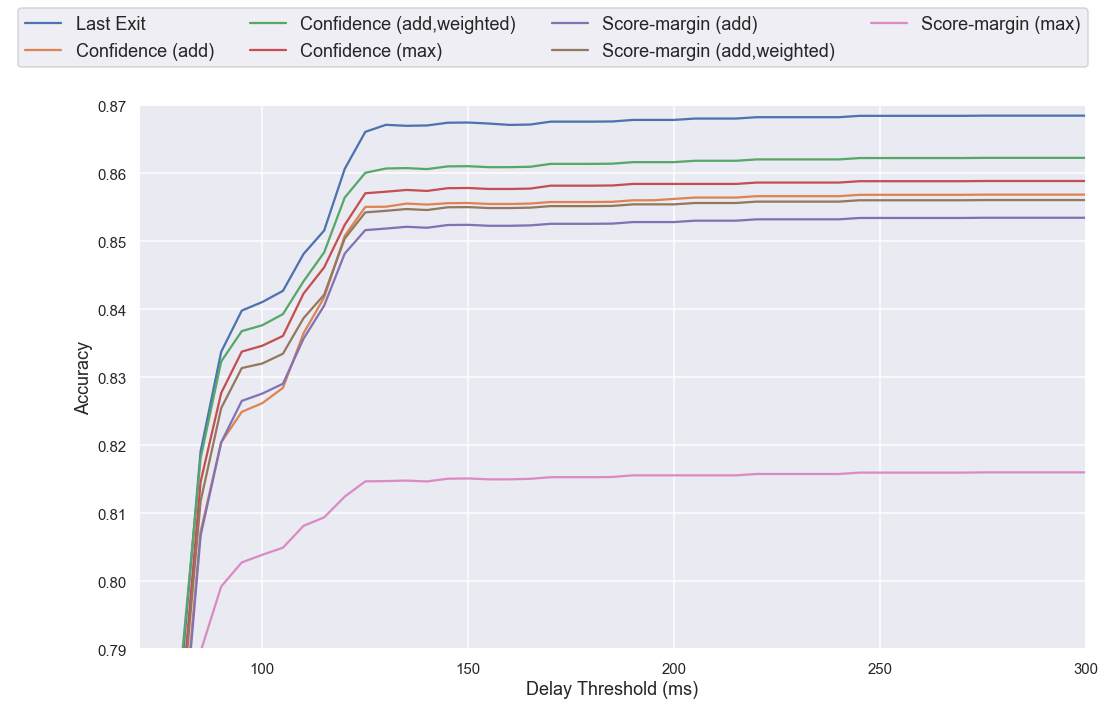

In [179]:
fig, axes = plt.subplots(1,1, figsize=(16,10))
axes.plot(df['Delay Threshold'], df['latest'])
axes.plot(df['Delay Threshold'], df['confidence (add)'])
axes.plot(df['Delay Threshold'], df['confidence (add,weighted)'])
axes.plot(df['Delay Threshold'], df['confidence (max)'])
axes.plot(df['Delay Threshold'], df['score_margin (add)'])
axes.plot(df['Delay Threshold'], df['score-margin (add,weighted)'])
axes.plot(df['Delay Threshold'], df['score-margin (max)'])
axes.set_xlim([70,300])
axes.set_ylim([0.79,0.87])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Accuracy')
fig.legend(['Last Exit', 'Confidence (add)', 'Confidence (add,weighted)', 'Confidence (max)',
           'Score-margin (add)', 'Score-margin (add,weighted)', 'Score-margin (max)'], ncol=4, 
           loc="upper center", fontsize='medium')
fig.tight_layout()
fig.subplots_adjust(top=0.85, left=0.15)
plt.savefig('information-combination.png')

In [137]:
df['missed'][0] = 5000
df['missed'][1] = 5000

df['Exit'][0] = [0,0,0,0]
df['Exit'][1] = [0,0,0,0]

exits = np.array(df['Exit'].tolist())
exits[:,0]

C:\Users\ajk\AppData\Local\Continuum\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\ajk\AppData\Local\Continuum\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ajk\AppData\Local\Continuum\miniconda3\envs\pytorch\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/u

array([  0.,   0., 117., 282., 512., 297., 118.,  45.,  31.,  26.,  28.,
        24.,  21.,  21.,  21.,  20.,  20.,  19.,  18.,  16.,  15.,  13.,
        11.,  11.,   9.,   9.,   9.,   9.,   8.,   8.,   8.,   8.,   8.,
         8.,   7.,   7.,   7.,   7.,   5.,   5.,   5.,   5.,   4.,   4.,
         4.,   3.,   3.,   2.,   2.,   2.,   2.])

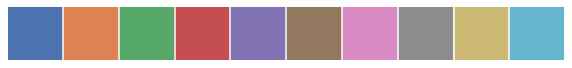

In [153]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

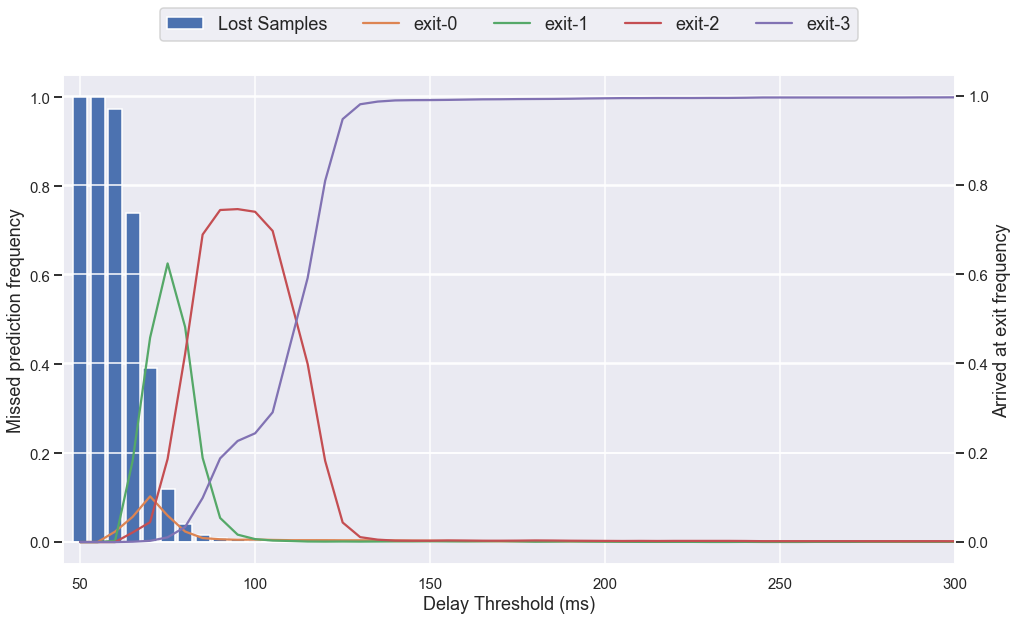

In [178]:
fig, axes = plt.subplots(1,1)

axes.bar(df['Delay Threshold'], df['missed'] / 5000, width=4)
axes.set_xlim([45,300])
axes.set_ylim([-0.05,1.05])
axes.set(xlabel='Delay Threshold (ms)', ylabel='Missed prediction frequency')

ax2 = axes.twinx()  # instantiate a second axes that shares the same x-axis

ax2.plot(df['Delay Threshold'], exits[:,0]/5000,  color=current_palette[1])
ax2.plot(df['Delay Threshold'], exits[:,1]/5000,  color=current_palette[2])
ax2.plot(df['Delay Threshold'], exits[:,2]/5000,  color=current_palette[3])
ax2.plot(df['Delay Threshold'], exits[:,3]/5000,  color=current_palette[4])


ax2.set(ylabel='Arrived at exit frequency')


fig.legend(['Lost Samples'] + ['exit-{}'.format(x) for x in range(4)], ncol=5, loc="upper center", fontsize='medium')
plt.savefig('exit-reached.png')